# Pytorch 🔥

Introduction to pytorch

This notebook is assembled from these sources:
- [practical-dl seminar](https://github.com/yandexdataschool/Practical_DL/blob/fall21/week02_autodiff/seminar_pytorch.ipynb)
- [hse dl-course homework](https://github.com/aosokin/dl_cshse_ami/blob/master/2021-fall/homeworks_small/shw2/DL21-fall-shw2.ipynb)
- [nyu dl course tensor tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/01-tensor_tutorial.ipynb)
- [nyu dl course autograd tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/03-autograd_tutorial.ipynb)
- [pytorch docs](https://pytorch.org/docs/stable/)

In [147]:
#!g1.1
!nvidia-smi

Mon Feb 13 13:27:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:8C:00.0 Off |                    0 |
| N/A   31C    P0    26W / 250W |      4MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [151]:
#!g1.1
!which python3
!python3 -V

/usr/local/bin/python3
Python 3.7.10


Installing pytorch (easier then ever):

- Better use virtualenv ([conda](https://docs.conda.io/en/latest/miniconda.html) **is ok**)
- `pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html` (https://pytorch.org/get-started/locally/)

In [152]:
#!g1.1
import torch

In [153]:
#!g1.1
torch.__version__

'1.9.0+cu102'

## Basics:

Jupyter lifehacks:

In [ ]:
#!g1.1
torch.sq  # <Tab>

In [155]:
#!g1.1
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [ ]:
#!g1.1
torch.nn.Module()  # <Shift>+<Tab>

In [156]:
#!g1.1
# Annotate your functions / classes!
torch.nn.Module?

Init signature: torch.nn.Module()
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File: 

In [157]:
#!g1.1
torch.nn.Module??

Init signature: torch.nn.Module()
Source:        
class Module:
    r"""Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: bool
    ""

### Tensor class

In [158]:
#!g1.1
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [159]:
#!g1.1
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [160]:
#!g1.1
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [161]:
#!g1.1
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [162]:
#!g1.1
t

tensor([[[1.4582e-19, 5.0749e+33, 9.0678e-07, 7.3614e+22],
         [1.8987e+28, 1.2190e+33, 3.3751e-15, 3.2327e+27],
         [1.4295e+31, 3.5981e-06, 1.1722e+27, 7.4029e+28]],

        [[1.7517e+22, 2.2228e-15, 1.0902e+27, 2.1036e+20],
         [2.9982e+29, 3.5541e+30, 2.3861e-04, 1.4582e-19],
         [7.5392e+25, 1.4171e-08, 5.4075e+22, 5.2728e-08]]])

In [163]:
#!g1.1
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[8., 4., 5., 6.],
         [7., 6., 4., 2.],
         [4., 6., 6., 1.]],

        [[8., 2., 0., 1.],
         [4., 1., 0., 8.],
         [0., 1., 3., 4.]]])

In [164]:
#!g1.1
t

tensor([[[8., 4., 5., 6.],
         [7., 6., 4., 2.],
         [4., 6., 6., 1.]],

        [[8., 2., 0., 1.],
         [4., 1., 0., 8.],
         [0., 1., 3., 4.]]])

In [165]:
#!g1.1
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[8., 4., 5., 6., 7., 6., 4., 2.],
        [4., 6., 6., 1., 8., 2., 0., 1.],
        [4., 1., 0., 8., 0., 1., 3., 4.]])

In [166]:
#!g1.1
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [167]:
#!g1.1
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [168]:
#!g1.1
# This *is* important, sigh...
s = r.clone()

In [169]:
#!g1.1
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [170]:
#!g1.1
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

### Vectors and matrices

In [171]:
#!g1.1
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [172]:
#!g1.1
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [173]:
#!g1.1
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [174]:
#!g1.1
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [175]:
#!g1.1
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [176]:
#!g1.1
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 4., 7., 8., 2.])

In [177]:
#!g1.1
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 2.0


In [178]:
#!g1.1
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([4., 7.])

In [183]:
#!g1.1
# But :.(
try:
    x[::-1]
except ValueError as e:
    print("Nope :(")
    print(e)

Nope :(
step must be greater than zero


In [184]:
#!g1.1
v

tensor([1., 2., 3., 4.])

In [185]:
#!g1.1
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [186]:
#!g1.1
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [187]:
#!g1.1
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [188]:
#!g1.1
m.dim()

2

In [189]:
#!g1.1
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [190]:
#!g1.1
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [191]:
#!g1.1
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [192]:
#!g1.1
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [193]:
#!g1.1
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [194]:
#!g1.1
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [195]:
#!g1.1
# Indexing columns 1 and 3, all rows (returns size 2x2)
m[:, [1,3]]

tensor([[5., 7.],
        [2., 9.]])

In [196]:
#!g1.1
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [197]:
#!g1.1
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [198]:
#!g1.1
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [199]:
#!g1.1
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [200]:
#!g1.1
# Scalar product
m @ v

tensor([49., 47.])

In [201]:
#!g1.1
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [202]:
#!g1.1
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [203]:
#!g1.1
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.7644, 5.1218, 3.9315, 7.6247],
        [4.3952, 2.8963, 1.1369, 9.1636]])

In [204]:
#!g1.1
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.8568, 4.4051, 2.1226, 6.5889],
        [3.7347, 1.9752, 0.5281, 8.5260]])

In [205]:
#!g1.1
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.8498, 2.1579, 1.6407, 0.0684],
        [1.0685, 1.1206, 0.2777, 7.6075]])

In [206]:
#!g1.1
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 3.8680,  5.8322,  8.0373, 52.8155],
        [ 4.7040,  5.0893,  5.7061, 13.8658]])

In [207]:
#!g1.1
m.size()

torch.Size([2, 4])

In [208]:
#!g1.1
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [209]:
#!g1.1
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

### Constructors

In [210]:
#!g1.1
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [211]:
#!g1.1
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [212]:
#!g1.1
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [213]:
#!g1.1
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [214]:
#!g1.1
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [215]:
#!g1.1
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Casting

In [216]:
#!g1.1
# Helper to get what kind of tensor types
# torch.*Tensor?

In [217]:
#!g1.1
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [218]:
#!g1.1
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [219]:
#!g1.1
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [220]:
#!g1.1
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [221]:
#!g1.1
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [222]:
#!g1.1
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [223]:
#!g1.1
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [224]:
#!g1.1
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

### More:

- *Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.
- It's *almost* numpy, but not quite (but people are working on it https://data-apis.org/array-api/latest/purpose_and_scope.html)
- Cool library (einops): https://openreview.net/forum?id=oapKSVM2bcj
- Competition strong! https://github.com/google/jax

---
## Autograd

Basics

In [244]:
#!g1.1
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


Do an operation on the tensor:

In [245]:
#!g1.1
# Deduct 2 from all elements
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [246]:
#!g1.1
print(y.grad_fn)

In [247]:
#!g1.1
# What's happening here?
print(x.grad_fn)

None


In [248]:
#!g1.1
# Let's dig further...
y.grad_fn

In [249]:
#!g1.1
y.grad_fn.next_functions

((<AccumulateGrad at 0x7fb04dcc5a10>, 0), (None, 0))

In [250]:
#!g1.1
y.grad_fn.next_functions[0][0]

In [251]:
#!g1.1
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [252]:
#!g1.1
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [255]:
#!g1.1
%pip install torchviz

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=8774d3a087aeeefb2f9453a84b973db91016fc90bb6b6f877a4bda4ef799a747
  Stored in directory: /tmp/xdg_cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [256]:
#!g1.1
# Let's visualise the computational graph! (thks @szagoruyko)
from torchviz import make_dot

In [257]:
#!g1.1
make_dot?

Signature:
make_dot(
    var,
    params=None,
    show_attrs=False,
    show_saved=False,
    max_attr_chars=50,
)
Docstring:
Produces Graphviz representation of PyTorch autograd graph.

If a node represents a backward function, it is gray. Otherwise, the node
represents a tensor and is either blue, orange, or green:
 - Blue: reachable leaf tensors that requires grad (tensors whose `.grad`
     fields will be populated during `.backward()`)
 - Orange: saved tensors of custom autograd functions as well as those
     saved by built-in backward nodes
 - Green: tensor passed in as outputs
 - Dark green: if any output is a view, we represent its base tensor with
     a dark green node.

Args:
    var: output tensor
    params: dict of (name, tensor) to add names to node that requires grad
    show_attrs: whether to display non-tensor attributes of backward nodes
        (Requires PyTorch version >= 1.9)
    show_saved: whether to display saved tensor nodes that are not by custom
        au

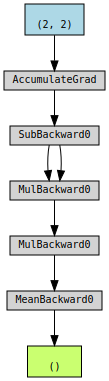

In [258]:
#!g1.1
make_dot(a)

### Gradients

Let's backprop now `out.backward()` is equivalent to doing `out.backward(torch.tensor([1.0]))`

In [259]:
#!g1.1
# Backprop
a.backward()

Print gradients $\frac{\text{d}a}{\text{d}x}$.




In [260]:
#!g1.1
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


You can do many crazy things with autograd!
> With Great *Flexibility* Comes Great Responsibility

In [261]:
#!g1.1
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)

y = x * 2
for i in range(10):
    y = y * 2
print(y)

tensor([  509.8071,   986.6153, -1081.8848], grad_fn=<MulBackward0>)


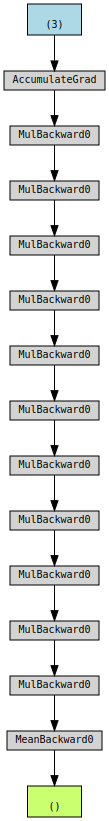

In [264]:
#!g1.1
make_dot(y.mean())

In [263]:
#!g1.1
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


### Inference

In [265]:
#!g1.1
# This variable decides the tensor's range below
n = 3

In [266]:
#!g1.1
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [267]:
#!g1.1
# Only w that allows gradient accumulation
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [268]:
#!g1.1
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)

# Non leaf node
h = w * x
h.retain_grad()

z = h.sum()
z.backward()
print(x.grad, w.grad, h.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])
tensor([1., 1., 1.])


/home/jupyter/.local/lib/python3.7/site-packages/torch/utils/hooks.py:62: UserWarning: backward hook <function Tensor.retain_grad.<locals>.retain_grad_hook at 0x7fb04db95170> on tensor will not be serialized.  If this is expected, you can decorate the function with @torch.utils.hooks.unserializable_hook to suppress this warning
  "to suppress this warning".format(repr(hook)))
/home/jupyter/.local/lib/python3.7/site-packages/torch/utils/hooks.py:62: UserWarning: backward hook <function Tensor.retain_grad.<locals>.retain_grad_hook at 0x7fb04db95170> on tensor will not be serialized.  If this is expected, you can decorate the function with @torch.utils.hooks.unserializable_hook to suppress this warning
  "to suppress this warning".format(repr(hook)))


In [269]:
#!g1.1
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

RuntimeError!!! >:[
element 0 of tensors does not require grad and does not have a grad_fn


/home/jupyter/.local/lib/python3.7/site-packages/torch/utils/hooks.py:62: UserWarning: backward hook <function Tensor.retain_grad.<locals>.retain_grad_hook at 0x7fb04db95170> on tensor will not be serialized.  If this is expected, you can decorate the function with @torch.utils.hooks.unserializable_hook to suppress this warning
  "to suppress this warning".format(repr(hook)))


In [271]:
#!g1.1
del h

### More:
- Good blog post on backprop: https://colah.github.io/posts/2015-08-Backprop/
- Advanced, but fun: https://minitorch.github.io/
- Documentation of the automatic differentiation package is at
http://pytorch.org/docs/autograd.

## Linear regression

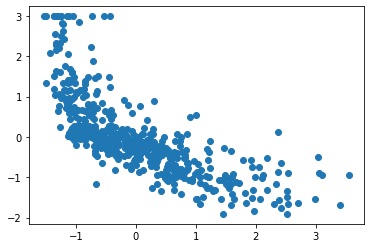

Error in callback <bound method MLKernel._post_run_cell of <__main__.MLKernel object at 0x7fb0cffb2c50>> (for post_run_cell):


Internal error. Results of this cell may be lost. Please contact support.


Exception: Unknown interval name: execute/run_cell

In [273]:
#!g1.1
%%capture --no-display
from sklearn.datasets import load_boston
from IPython.display import clear_output

X, y = load_boston(return_X_y=True)


x = (X[:, -1] - X[:, -1].mean()) / X[:, -1].std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y)
plt.show()

In [274]:
#!g1.1
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


### `[TODO]`

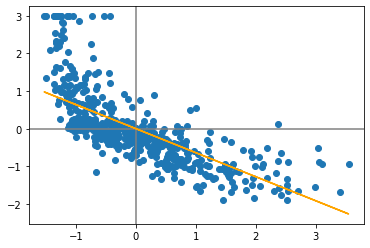

loss =  0.4656561613082886
Done!


In [275]:
#!g1.1

alpha = 0.1

for i in range(100):
    
    # compute loss
    # TODO <YOUR_CODE_HERE>
    
    # backprop
    # TODO <YOUR_CODE_HERE>

    # gradient descent step for weights
    # take alpha about 0.1
    # TODO <YOUR_CODE_HERE>
    
    # zero gradients
    # TODO <YOUR_CODE_HERE>
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Higher level APIs

Above we've coded linear regression and basic gradient descent by hand. In practice it becomes cumbersome to manage parameters, their updates when you go beyond linear regression. Pytorch also has high-level api's with common nn building blocks, optimizers, distributed training utils and more. (see [docs](https://pytorch.org/docs/stable/) for examples)

In [276]:
#!g1.1
!wget --quiet --show-progress "https://raw.githubusercontent.com/aosokin/dl_cshse_ami/master/2021-fall/homeworks_small/shw2/util.py"


     0K ...                                                   100% 22.2M=0s

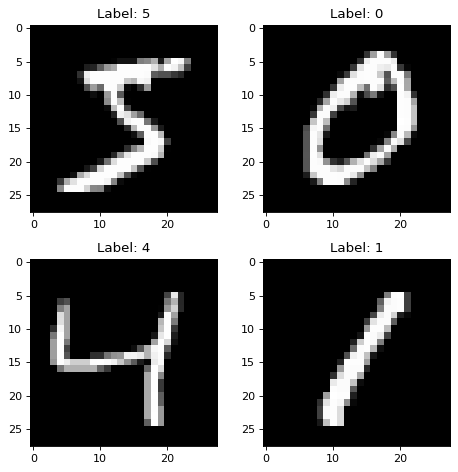

In [277]:
#!g1.1
# MNIST again
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');
fig.tight_layout()

In [278]:
#!g1.1
import torch.nn as nn
import torch.nn.functional as F

In [279]:
#!g1.1
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [280]:
#!g1.1
model = Net()

In [281]:
#!g1.1
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0253,  0.0244, -0.0354,  ..., -0.0191, -0.0314,  0.0349],
         [ 0.0025, -0.0241, -0.0307,  ...,  0.0247, -0.0315, -0.0236],
         [ 0.0076, -0.0277,  0.0342,  ...,  0.0241, -0.0071,  0.0115],
         ...,
         [ 0.0321, -0.0288, -0.0249,  ..., -0.0283, -0.0314,  0.0185],
         [-0.0244, -0.0005, -0.0046,  ..., -0.0221, -0.0137,  0.0093],
         [ 0.0258, -0.0032,  0.0296,  ...,  0.0110, -0.0179, -0.0317]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0019,  0.0118, -0.0181, -0.0065,  0.0304, -0.0030, -0.0051, -0.0192,
          0.0318, -0.0125, -0.0275, -0.0012,  0.0338,  0.0317, -0.0048, -0.0093,
         -0.0236, -0.0022, -0.0137,  0.0028, -0.0321, -0.0127, -0.0022, -0.0020,
          0.0092, -0.0194,  0.0333,  0.0297, -0.0283, -0.0045,  0.0006,  0.0150,
         -0.0301,  0.0244, -0.0085,  0.0157, -0.0039, -0.0337,  0.0229,  0.0008],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.1272, -0.0189

In [290]:
#!g1.1
model

Net(
  (fc1): Linear(in_features=784, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)

In [282]:
#!g1.1
from torch.utils.data import TensorDataset, DataLoader

In [296]:
#!g1.1
train_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.copy()).to(device), [X_train, y_train.astype(np.long)]))
test_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.copy()).to(device), [X_test, y_test.astype(np.long)]))

In [300]:
#!g1.1
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True, drop_last=True)
test_dl  = DataLoader(test_ds, batch_size=128, shuffle=False)

In [305]:
#!g1.1
# Write a train function
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
        
    model.train()
    for x_batch, y_batch in tqdm(train_dl, leave=False):
        optimizer.zero_grad()
        
        # compute loss
        # TODO <YOUR_CODE_HERE>
        
        # compute gradients
        # TODO <YOUR_CODE_HERE>
        
        # make a step
        optimizer.step()

        # TODO <YOUR_CODE_HERE>
        acc = # TODO <YOUR_CODE_HERE>
        acc_log.append(acc.item())

        loss = # TODO <YOUR_CODE_HERE>
        loss_log.append(loss)
    return loss_log, acc_log


# TODO: write a validation function
@torch.inference_mode()
def test(model):
    loss_log, acc_log = [], []
    model.eval()

    for x_batch, y_batch in tqdm(test_dl, leave=False):
        # compute loss
        # TODO <YOUR_CODE_HERE>

        loss = # TODO <YOUR_CODE_HERE>
        loss_log.append(loss)
        
        # TODO <YOUR_CODE_HERE>
        acc = # TODO <YOUR_CODE_HERE>
        acc_log.append(acc.item())

    return loss_log, acc_log


def plot_history(train_history, val_history, title='loss'):
    plt.figure(figsize=(25, 5))

    plt.title('{} at {} epoch'.format(title, epoch))
    plt.plot(train_history, label='train', zorder=1)
    
    points = torch.tensor(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

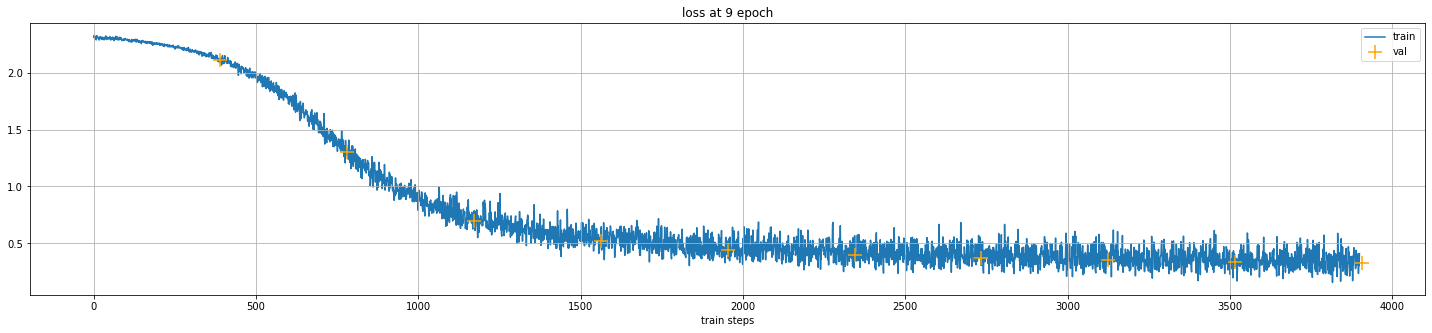

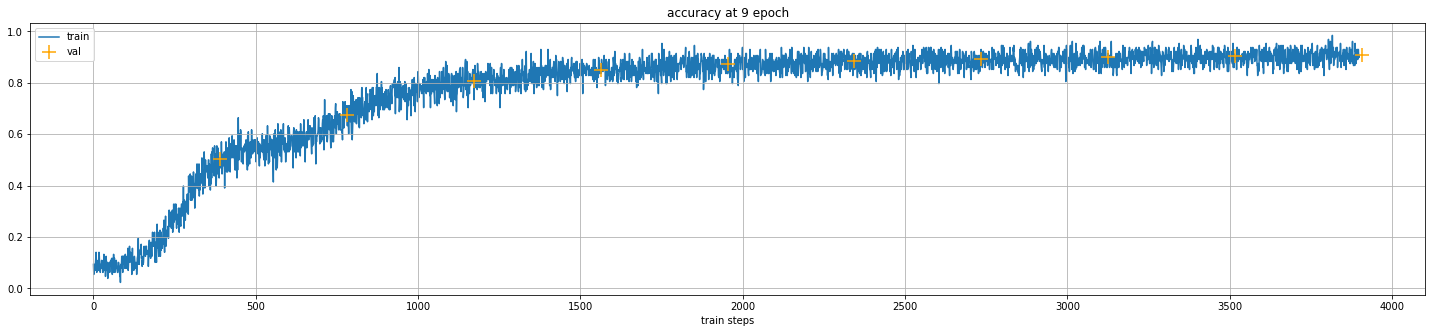

In [306]:
#!g1.1
from statistics import mean

train_log, train_acc_log = [],[]
val_log, val_acc_log = [],[]

model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
steps = len(train_ds) / 128

for epoch in range(10):
    train_loss, train_acc = train(model, opt)
    val_loss, val_acc = test(model)
    
    # store metrics
    # TODO <YOUR_CODE_HERE>
    
    # plot all metrics (loss and acc for train/val)
    # TODO <YOUR_CODE_HERE>

### More:

- https://pytorch.org/tutorials/
- https://pytorch.org/ecosystem/
- Pytorch examples - a repo that implements many cool DL models in pytorch - https://github.com/pytorch
- More on new pytorch data-loading - https://github.com/pytorch/data